# Airbnb Data Exploration: San Francisco
### Author: Yu-Heng (Ryan) Lei
### Tool Resources:
- [pandas Python package for treating CSV tables as DataFrames](http://pandas.pydata.org/) [strongly recommended, similar to R's data frames and plyr package]
- [10-minute tour of pandas (in Jupyter Notebook) @ Vimeo](https://vimeo.com/59324550)
- [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough @ YouTube](https://youtu.be/HW29067qVWk)
 - If you're interested in creating *fancy* documentation with code and plots like this :)
 - A Jupyter Notebook contains both **computer code** (e.g. Python) and **rich text elements** (paragraph, equations, figures, links, etc...). Notebook documents are both human-readable documents containing the analysis description and the results **(figures, tables, etc..)** as well as **executable documents** which can be run to perform data analysis
 - I use Jupyter (formerly iPython) Notebook as an interactive Python IDE, too! With beautiful pandas DataFrame rendering


## Load CSV data into pandas DataFrame
Source: http://insideairbnb.com/get-the-data.html

Adjust the paths according your system's setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(11634)
pd.set_option('max_columns', 100)

In [2]:
# Put everything else in other cells because we'll only read the files once
csv_details = '../data/Airbnb/SanFrancisco_details.csv'
# Handle DtypeWarning: Columns (43) have mixed types. [One entry with zipcode '94107-1273']
# Fix dollar sign and thousands separators in 'price'
df = pd.read_csv(csv_details, dtype={'host_id': np.str, 'zipcode': np.str},
                   converters={'price': lambda s: float(s.replace('$', '').replace(',', ''))})

## Dataset structure
* A total of 8,619 properties, details CSV with 95 variables

In [3]:
# Both files have the same number of properties. Don't believe in the number of CSV lines
print('details.shape: ' + str(df.shape))
print(df.columns)

details.shape: (8619, 95)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommod

In [4]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11187767,https://www.airbnb.com/rooms/11187767,20160702162156,2016-07-02,Huge Seacliff Penthouse With Views,Amazing views from this immense 3 bedroom/ 2 b...,"Spacious patio deck, library with over 300 mov...",Amazing views from this immense 3 bedroom/ 2 b...,none,"The neighborhood includes Legion of Honor, Sut...",We require a separate rental agreement to be s...,Public Transportation including Muni and the B...,Guests have access to the entire flat includin...,I am available 24 hours a day during your stay.,"1. Smoking is NOT allowed in the Property, Com...",https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,https://a2.muscache.com/im/pictures/e8652800-a...,58242037,https://www.airbnb.com/users/show/58242037,Jonathan,2016-02-10,"San Francisco, California, United States","Property Manager for Watt Property Management,...",within an hour,100%,100%,f,https://a2.muscache.com/im/pictures/351d2fbc-4...,https://a2.muscache.com/im/pictures/351d2fbc-4...,Richmond District,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"El Camino Del Mar, San Francisco, CA 94121, Un...",Richmond District,Seacliff,NaN,San Francisco,CA,94121,San Francisco,"San Francisco, CA",US,United States,37.779685,-122.510472,t,Condominium,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,Hea...",NaN,400.0,NaN,NaN,NaN,$200.00,1,$0.00,2,28,today,NaN,8,31,61,152,2016-07-02,3,2016-03-23,2016-06-25,80.0,9.0,9.0,9.0,9.0,9.0,8.0,t,NaN,SAN FRANCISCO,t,strict,f,f,1,0.88


## Basic summary statistics of interested variables
- review_scores_rating is generally too high (> 90), which may not be useful (discriminative)
 - Instead, number_of_reviews has a higher variation

In [5]:
# interested numeric variables (custom order)
df_num = df.loc[:, ['neighbourhood_cleansed', 'accommodates', 'beds', 'bedrooms', 'bathrooms', 'price',
                    'number_of_reviews', 'review_scores_rating', 'host_listings_count']]
df_num.describe()

,accommodates,beds,bedrooms,bathrooms,price,number_of_reviews,review_scores_rating,host_listings_count
count,8619.000000,8609.000000,8613.000000,8571.000000,8619.000000,8619.000000,6287.000000,8617.000000
mean,3.247360,1.800441,1.354348,1.308832,252.912055,19.693352,94.002386,5.271788
std,2.124207,1.372576,0.904556,0.655959,416.652420,37.688566,7.931188,28.315964
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,102.000000,0.000000,92.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,165.000000,4.000000,96.000000,1.000000
75%,4.000000,2.000000,2.000000,1.500000,260.000000,20.000000,100.000000,2.000000
max,16.000000,16.000000,10.000000,8.000000,10000.000000,428.000000,100.000000,845.000000


## Correlations and scatter plots
- **Surprisingly, pairs from intuition do not show high correlations!**
 - [accommodates, beds, bedrooms, bathrooms] vs. price
 - Even the correlations among these 4 quantities not very high
- **No numeric variable has more than 0.12 abs(correlation) with number_of_reviews or review_scores_rating**
 - Even number_of_reviews and review_scores_rating have only 0.026 correlation

In [6]:
df_num.corr()

,accommodates,beds,bedrooms,bathrooms,price,number_of_reviews,review_scores_rating,host_listings_count
accommodates,1.000000,0.745842,0.714655,0.443392,0.353459,-0.056664,0.029737,0.023455
beds,0.745842,1.000000,0.635157,0.508688,0.247917,-0.066541,0.018589,0.059632
bedrooms,0.714655,0.635157,1.000000,0.485717,0.378161,-0.088081,0.063749,-0.077916
bathrooms,0.443392,0.508688,0.485717,1.000000,0.242519,-0.101912,-0.020479,0.043359
price,0.353459,0.247917,0.378161,0.242519,1.000000,-0.100923,0.119419,-0.021187
number_of_reviews,-0.056664,-0.066541,-0.088081,-0.101912,-0.100923,1.000000,0.026193,-0.034864
review_scores_rating,0.029737,0.018589,0.063749,-0.020479,0.119419,0.026193,1.000000,-0.091526
host_listings_count,0.023455,0.059632,-0.077916,0.043359,-0.021187,-0.034864,-0.091526,1.000000


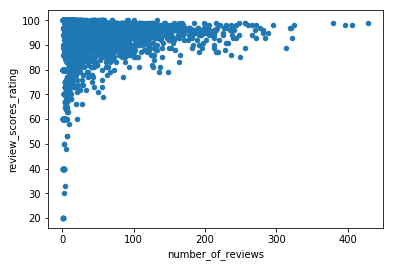

In [7]:
x = 'number_of_reviews'
y = 'review_scores_rating'
df.plot(x, y, kind='scatter')
plt.show()

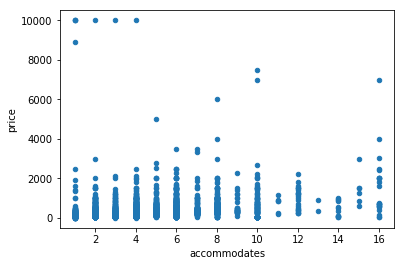

In [8]:
x = 'accommodates'
y = 'price'
df.plot(x, y, kind='scatter')
plt.show()

## Top TF-IDF scoring n-grams of the entire San Francisco
- With [stopwords (by sklearn)](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py) removed
- Could further remove common 'Airbnb words'

In [9]:
# Use sklearn's text processing tool
from sklearn.feature_extraction.text import *
from collections import OrderedDict

def top_TF_IDF(df, col='description', ngram_min=1, ngram_max=1, top_N = 20):
    # First, replace NaN with '' to prevent errors
    df[col].fillna('', inplace=True)
    
    model = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(ngram_min, ngram_max))

    # wc: word count matrix
    wc = model.fit_transform(list(df[col])).toarray()
    idx2voc = np.array(model.get_feature_names())
    voc2idx = model.vocabulary_

    # Examine top N n-grams
    sum_score = np.sum(wc, 0)
    top_idx = sum_score.argsort()[-1:-top_N-1:-1]
    top_ngram = idx2voc[top_idx]
    top_score = sum_score[top_idx]
    # top_score.shape
    return pd.DataFrame(OrderedDict({ 'word': top_ngram, 'score': top_score }))


### Top description unigrams

In [10]:
top_TF_IDF(df, 'description', ngram_min=1, ngram_max=1, top_N=50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
word,room,bedroom,apartment,kitchen,san,francisco,private,bed,home,street,house,access,located,living,park,restaurants,great,bathroom,city,large,walk,place,space,neighborhood,away,mission,blocks,close,queen,sf,area,parking,floor,walking,beautiful,quiet,location,available,bart,downtown,block,views,gate,guests,golden,easy,flat,spacious,distance,heart
score,389.547,306.558,300.274,261.845,259.062,254.048,250.238,237.605,233.939,229.232,217.916,217.342,216.765,215.617,214.184,211.859,211.158,209.23,201.531,201.184,200.725,187.395,187.255,187.005,183.726,183.172,179.094,175.407,170.102,166.91,166.867,161.693,156.516,154.989,153.906,153.123,151.877,151.129,151.029,150.908,148.666,146.147,145.854,145.275,143.786,143.645,141.391,141.177,140.816,137.848


### Top description bigrams

In [11]:
top_TF_IDF(df, 'description', ngram_min=2, ngram_max=2, top_N=30).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
word,san francisco,living room,golden gate,walking distance,gate park,public transportation,washer dryer,size bed,minute walk,easy access,queen bed,union square,queen size,restaurants bars,blocks away,dining room,private room,street parking,mission district,noe valley,bedroom apartment,centrally located,block away,private bathroom,master bedroom,hardwood floors,place good,hayes valley,gate bridge,dolores park
score,156.51,101.94,85.0134,81.9755,64.696,56.8297,56.4485,49.9421,49.3746,48.166,48.0143,46.7359,45.7826,44.8864,44.0231,42.2139,42.096,41.7419,41.0102,38.7292,38.031,37.7665,37.3804,35.9541,34.8428,33.3389,33.2719,33.1261,32.5315,32.2663


### Top description trigrams

In [12]:
top_TF_IDF(df, 'description', ngram_min=3, ngram_max=3, top_N=20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,golden gate park,queen size bed,golden gate bridge,heart san francisco,san francisco short,solo adventurers business,place good couples,adventurers business travelers,francisco short term,ll love place,couples solo adventurers,kitchen living room,good couples solo,fully equipped kitchen,queen sized bed,downtown san francisco,living room kitchen,short term residential,flat screen tv,10 minute walk
score,56.4052,31.2508,28.4327,25.4692,22.2259,22.0771,22.0587,21.9777,21.7073,21.613,20.9644,20.696,20.12,18.8278,18.012,16.5188,15.3443,15.1114,14.9692,14.9043


### Top amenity unigrams

In [13]:
top_TF_IDF(df, 'amenities', ngram_min=1, ngram_max=1, top_N=50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
word,internet,detector,tv,dryer,wireless,friendly,kitchen,heating,essentials,smoke,washer,shampoo,carbon,monoxide,extinguisher,family,kid,hangers,cable,laptop,workspace,hair,iron,kit,aid,hour,check,24,pets,translation,missing,en,intercom,buzzer,premises,parking,free,indoor,fireplace,building,elevator,card,safety,property,live,air,conditioning,allowed,hosting_amenity_50,dog
score,1731.2,1559.37,1368.43,1252,1193.89,1150.76,984.551,961.661,939.057,915.811,888.719,858.079,808.711,808.711,772.283,753.129,753.129,716.049,711.917,701.998,701.998,699.018,675.393,640.867,640.867,583.925,583.925,583.925,528.43,526.062,526.062,526.062,492.283,492.283,458.3,458.3,458.3,412.698,412.698,395.307,395.307,385.814,385.814,374.87,374.87,317.853,317.853,314.915,291.086,278.152
